In [2]:
#Loading libraries
import numpy as np 
import pandas as pd 
from scipy.io import arff
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pyswarms as ps
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading File
data = arff.loadarff('/Training Dataset.arff')
df = pd.DataFrame(data[0])
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,b'1',b'-1',b'1',b'-1',b'1',b'1',b'1',b'1',b'-1',b'-1',...,b'-1',b'-1',b'1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'1'
11051,b'-1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',b'-1',b'-1',...,b'-1',b'1',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'-1'
11052,b'1',b'-1',b'1',b'1',b'1',b'-1',b'1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'0',b'1',b'-1'
11053,b'-1',b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',...,b'-1',b'1',b'1',b'1',b'1',b'-1',b'1',b'1',b'1',b'-1'


In [4]:
df.shape

(11055, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [6]:
for k  in  df.columns:
    for  i in  range(0,len(df)):
        if df[k][i]==b'1':
            df[k][i]=1
        elif df[k][i]==b'-1':
            df[k][i]=-1
        else:
            df[k][i]=0

df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [7]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


In [8]:
pd.DataFrame(df.isnull().sum(), columns=["nbr missing  value  ech  colone"])

,nbr missing value ech colone
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


In [9]:
df.dtypes

having_IP_Address              object
URL_Length                     object
Shortining_Service             object
having_At_Symbol               object
double_slash_redirecting       object
Prefix_Suffix                  object
having_Sub_Domain              object
SSLfinal_State                 object
Domain_registeration_length    object
Favicon                        object
port                           object
HTTPS_token                    object
Request_URL                    object
URL_of_Anchor                  object
Links_in_tags                  object
SFH                            object
Submitting_to_email            object
Abnormal_URL                   object
Redirect                       object
on_mouseover                   object
RightClick                     object
popUpWidnow                    object
Iframe                         object
age_of_domain                  object
DNSRecord                      object
web_traffic                    object
Page_Rank   

In [10]:
df = df.apply(pd.to_numeric)

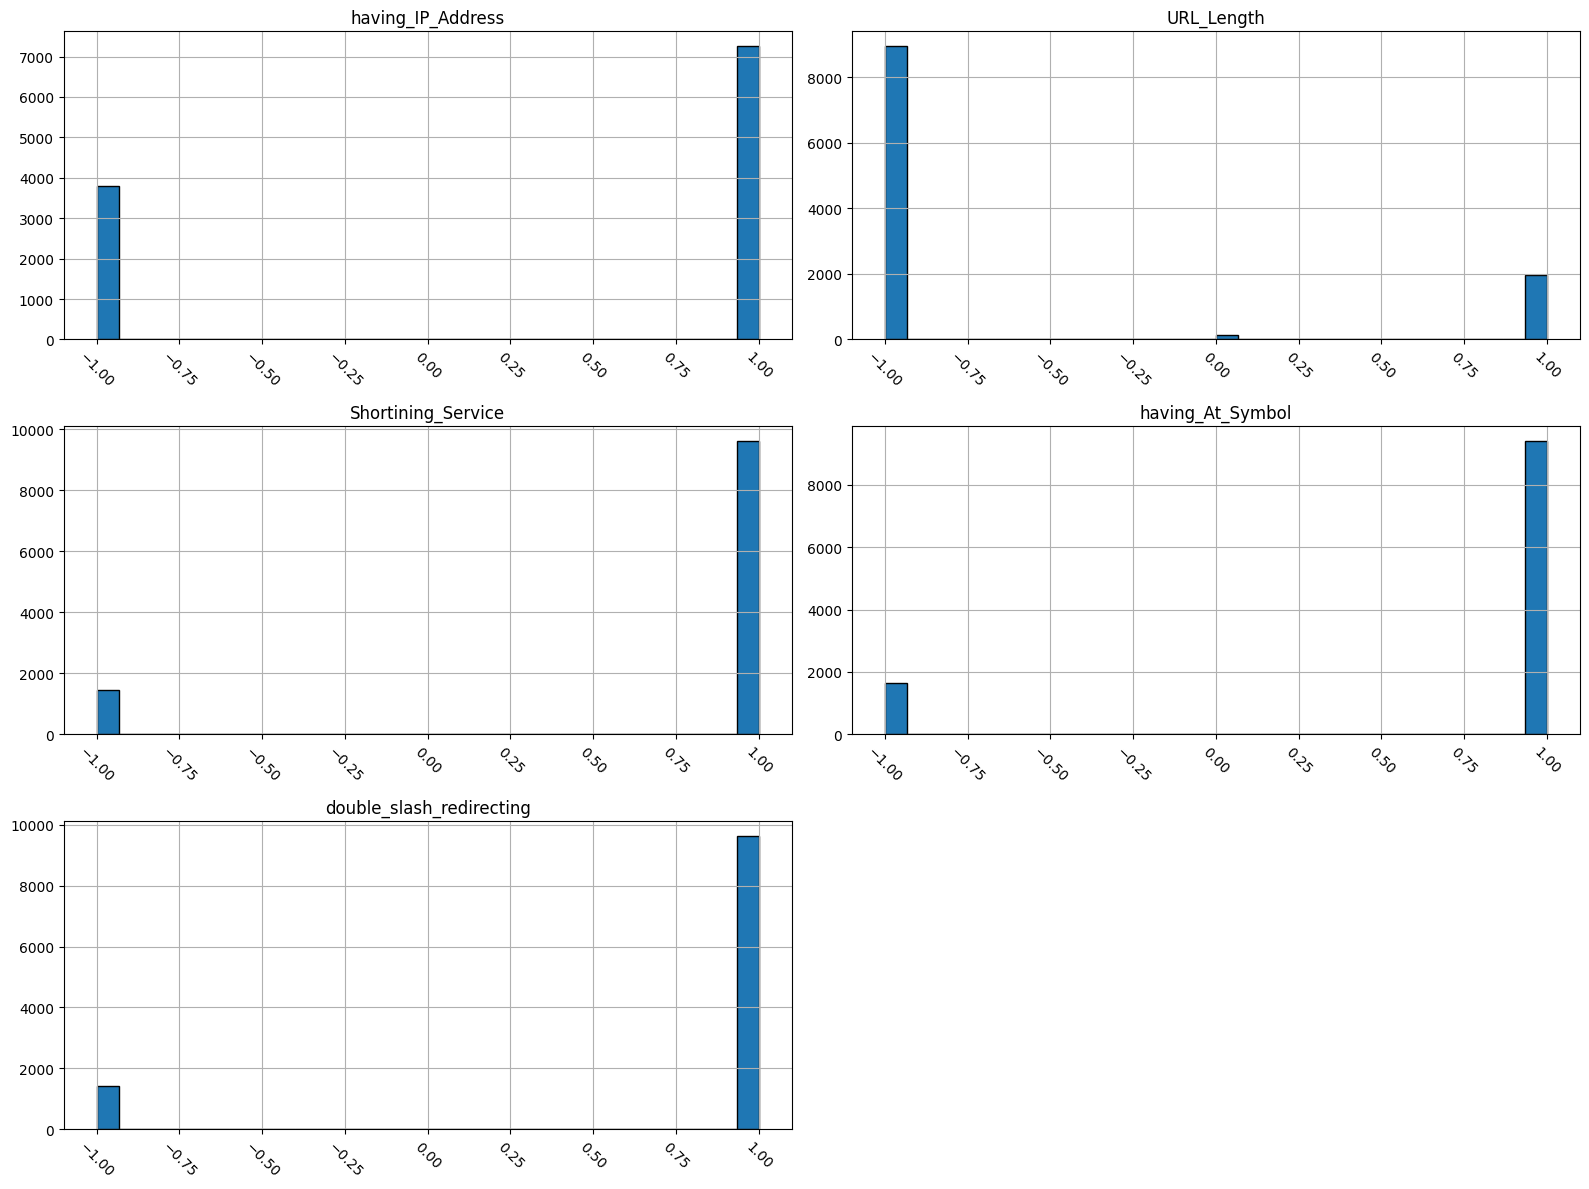

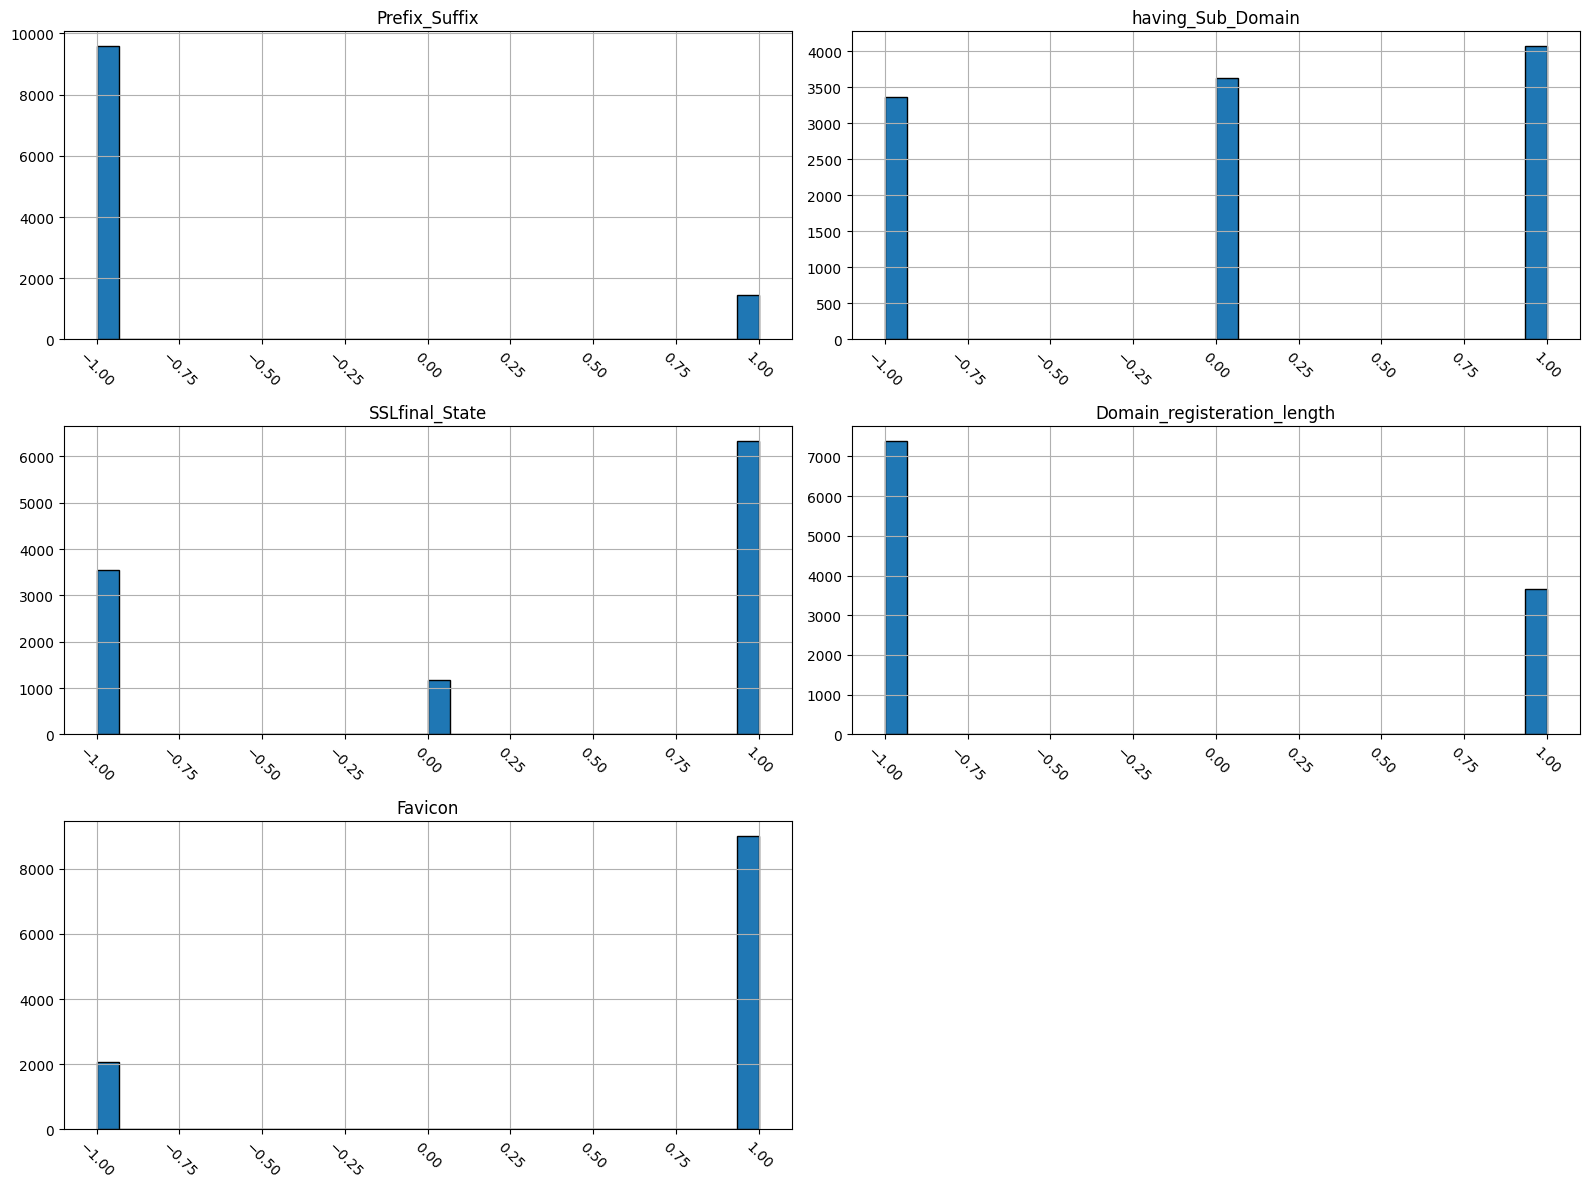

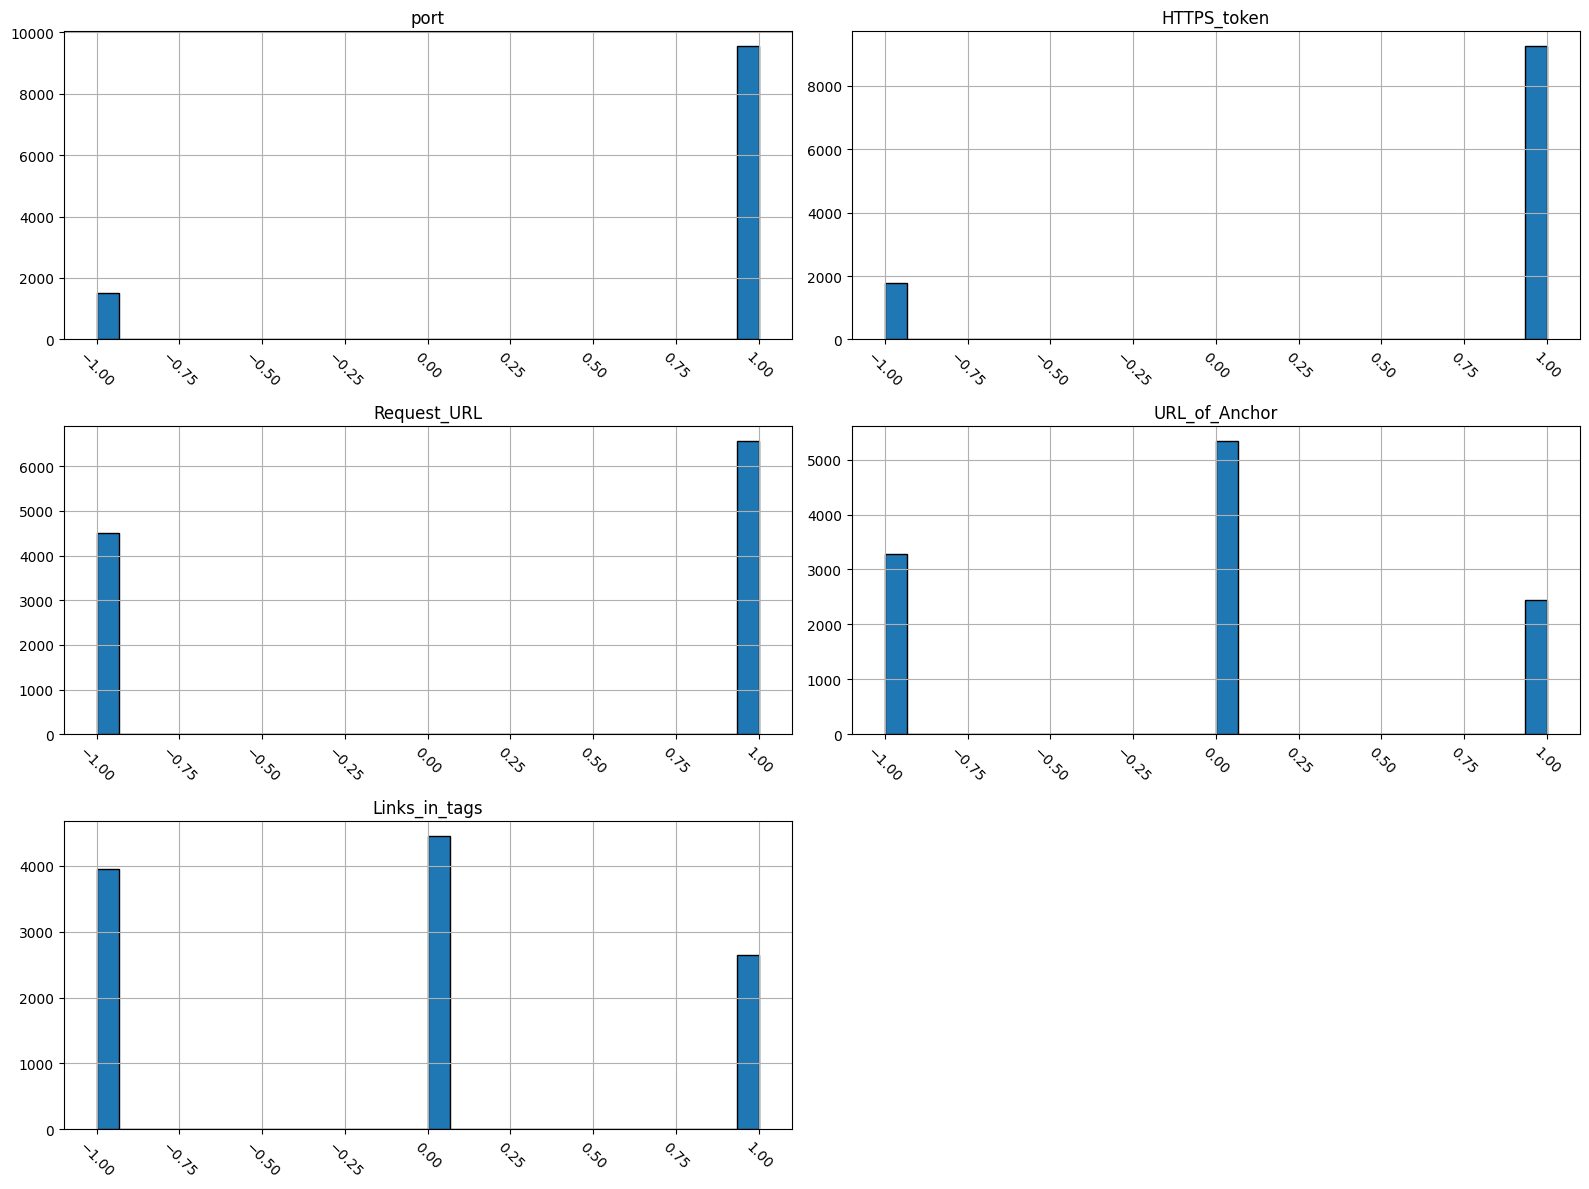

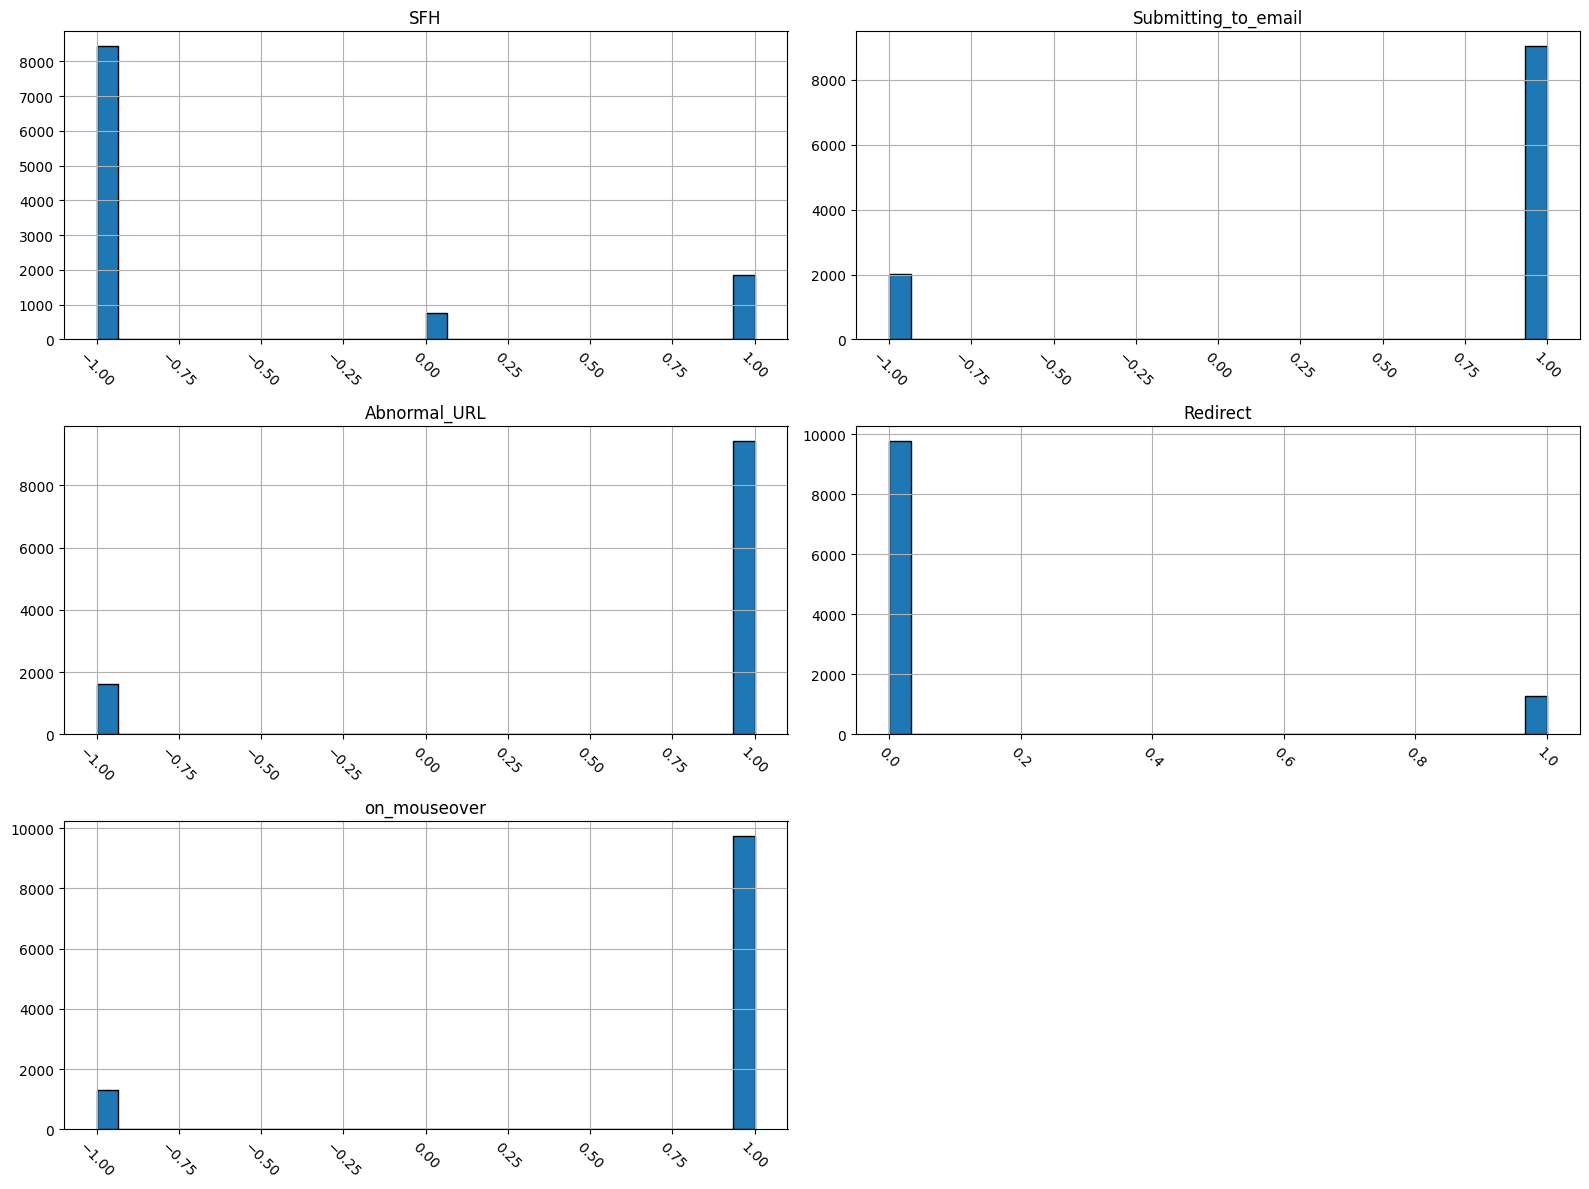

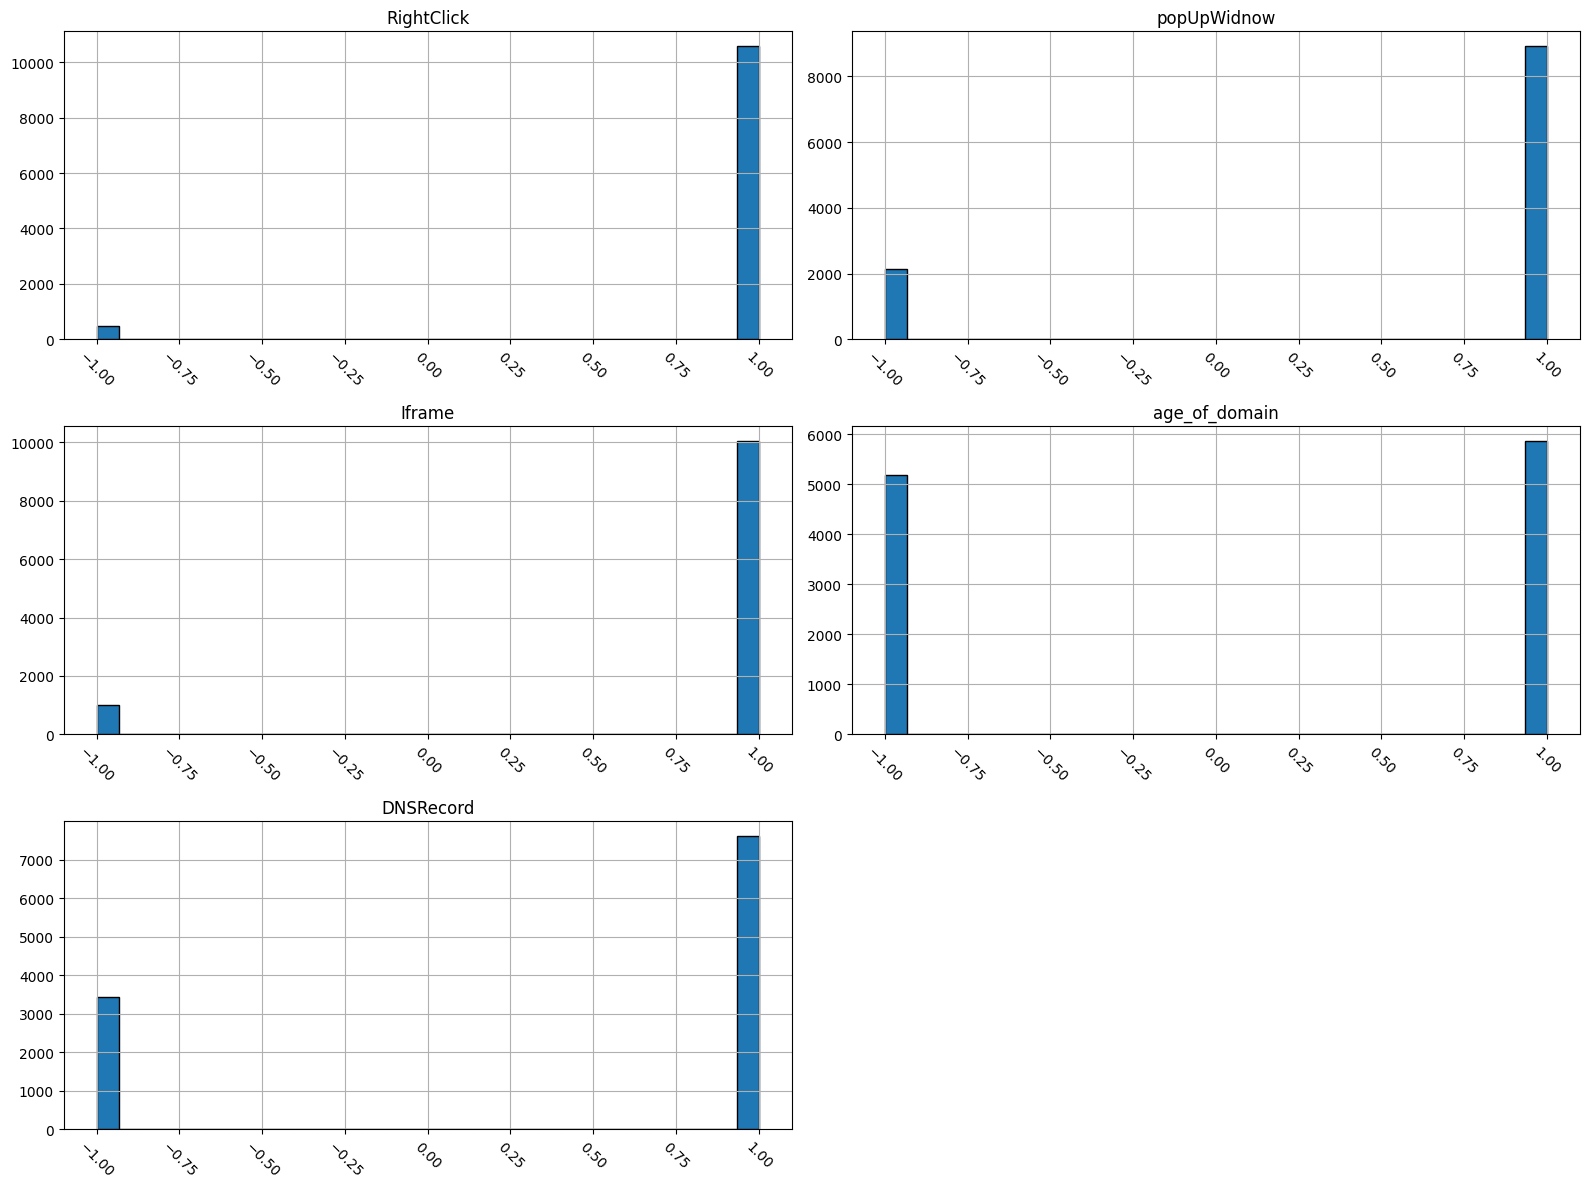

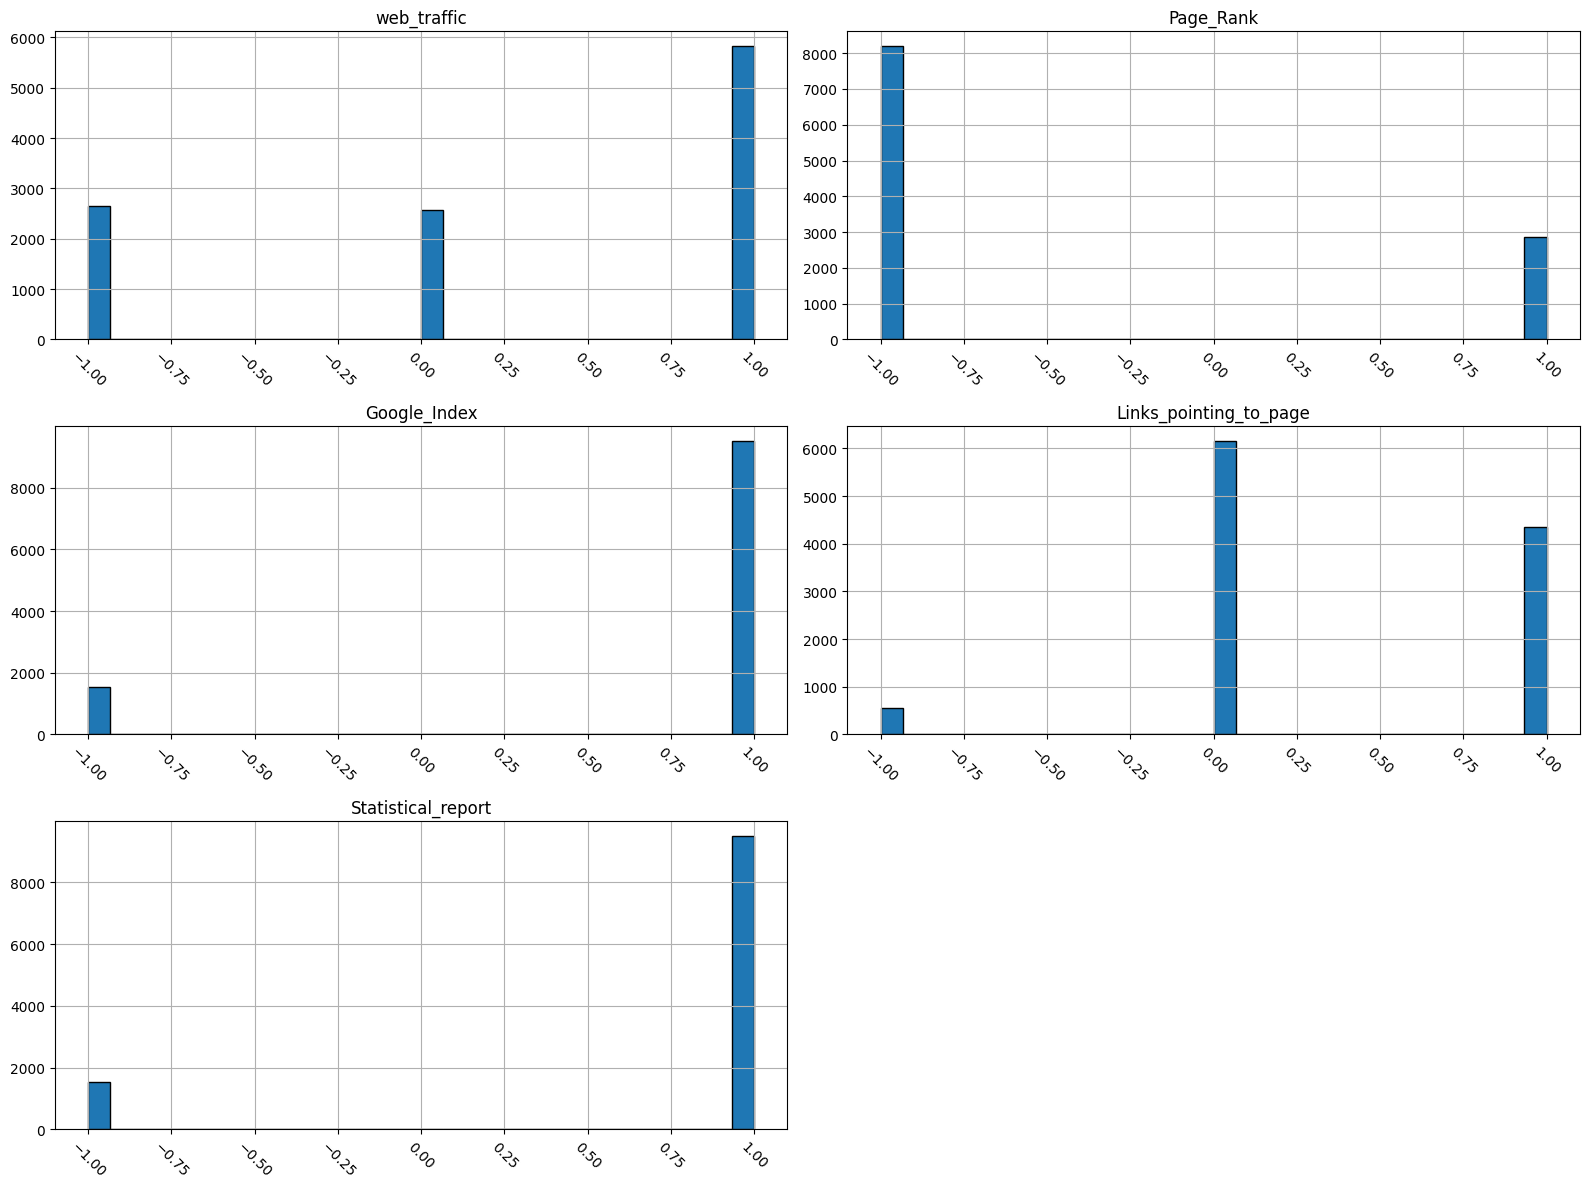

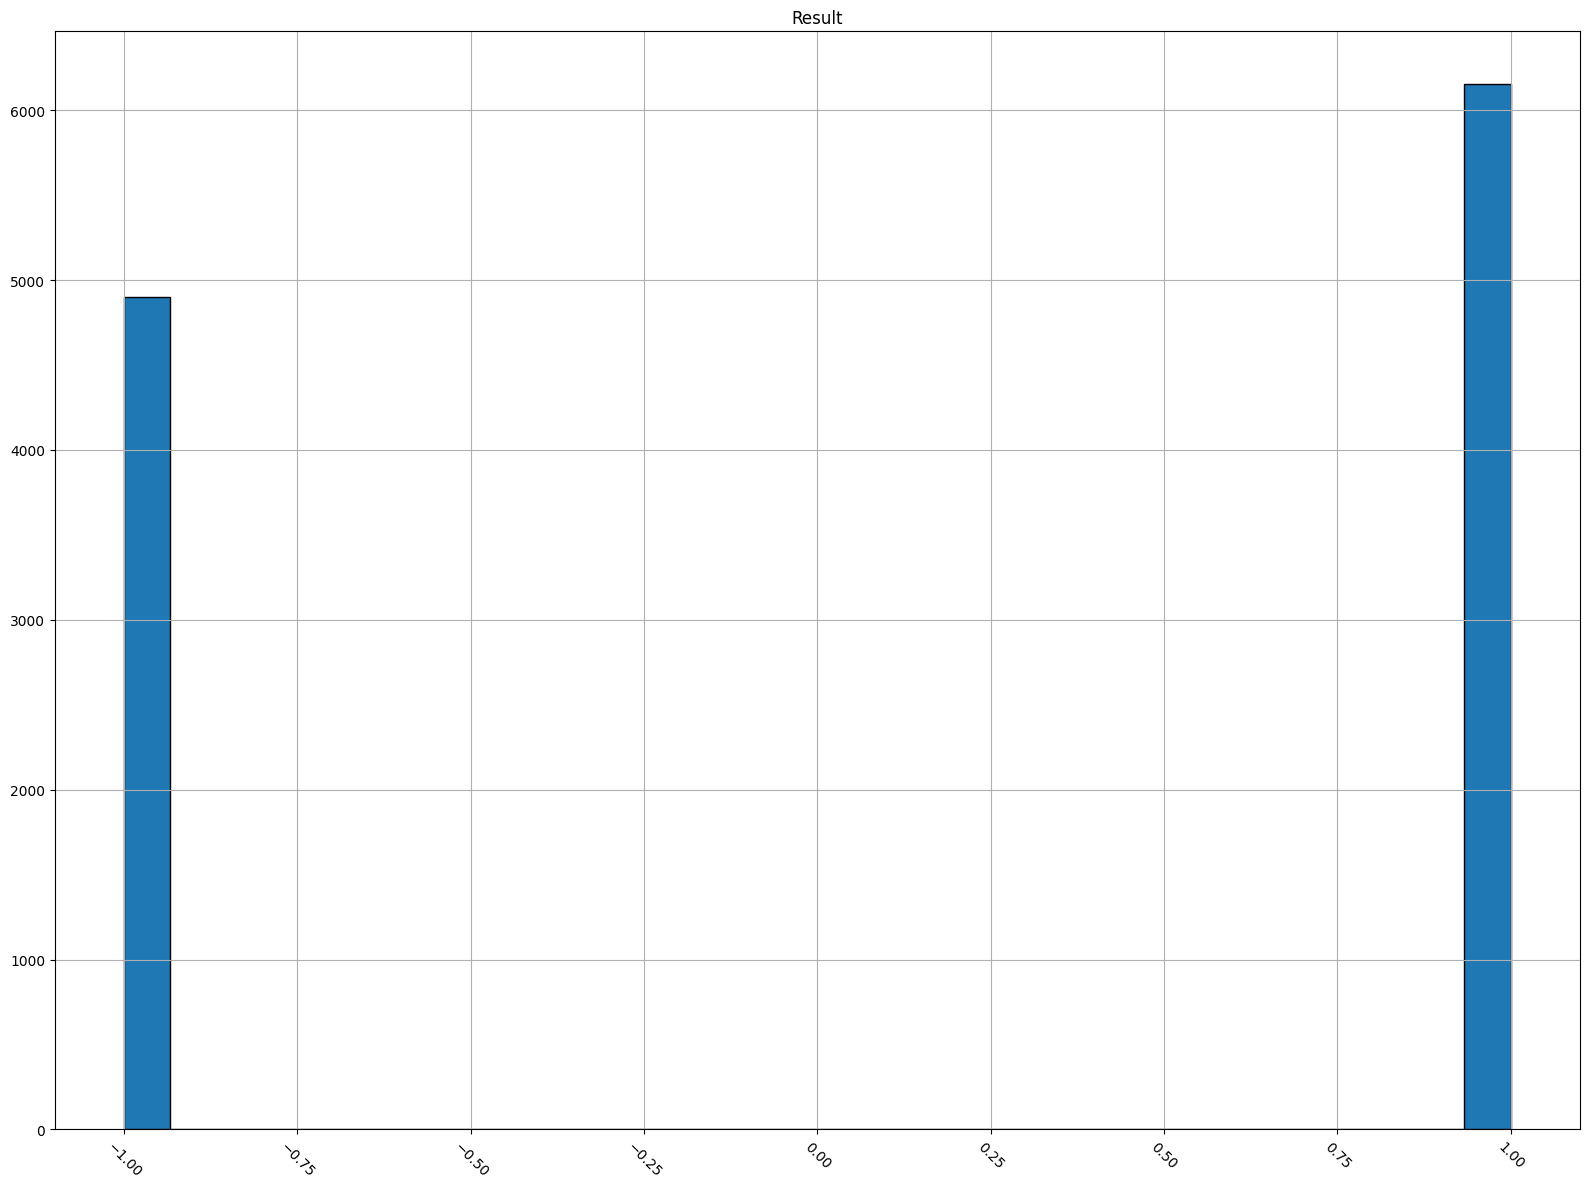

In [11]:
import matplotlib.pyplot as plt
n_cols = 5
n_rows = (len(df.columns) + n_cols - 1) // n_cols

for i in range(n_rows):
    cols = df.columns[i*n_cols : (i+1)*n_cols]
    df[cols].hist(figsize=(16, 12), bins=30, edgecolor='black', xrot=-45)
    plt.tight_layout()
    plt.show()

In [12]:
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [13]:
X = df.iloc[: ,:-1].values
Y = df['Result'].values

In [14]:
from sklearn.preprocessing import LabelEncoder
# For multi-class (if you have other values besides -1)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.10,random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9949, 30), (9949,), (1106, 30), (1106,))

In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Time: 0.2311 seconds
Testing Time: 0.0005 seconds
*******************************************
Training Accuracy: 0.9283345059805006
Testing Accuracy: 0.9276672694394213
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       481
           1       0.93      0.94      0.94       625

    accuracy                           0.93      1106
   macro avg       0.93      0.93      0.93      1106
weighted avg       0.93      0.93      0.93      1106

Accuracy Score: 0.9276672694394213
Precision Score: 0.9269797314204689
Recall Score: 0.9257014553014553
F1 Score: 0.9263118620579378
Matthews Correlation Coefficient: 0.8526802285732161
*******************************************
[[438  43]
 [ 37 588]]
True Positive =  588
False Positive =  43
False Negative =  37
True Negative =  438
*******************************************


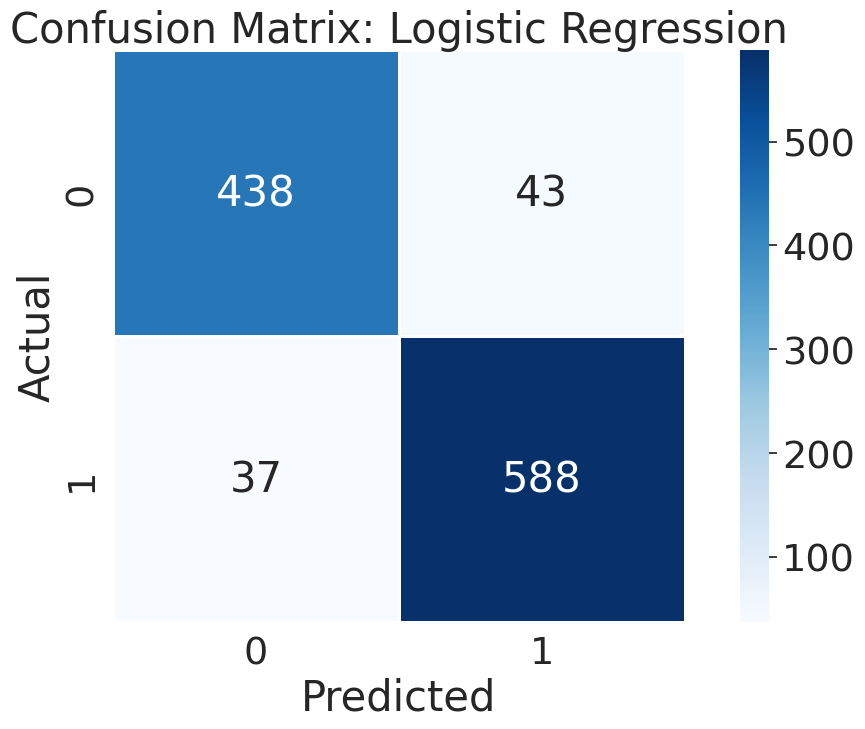

AUC Score = 0.926


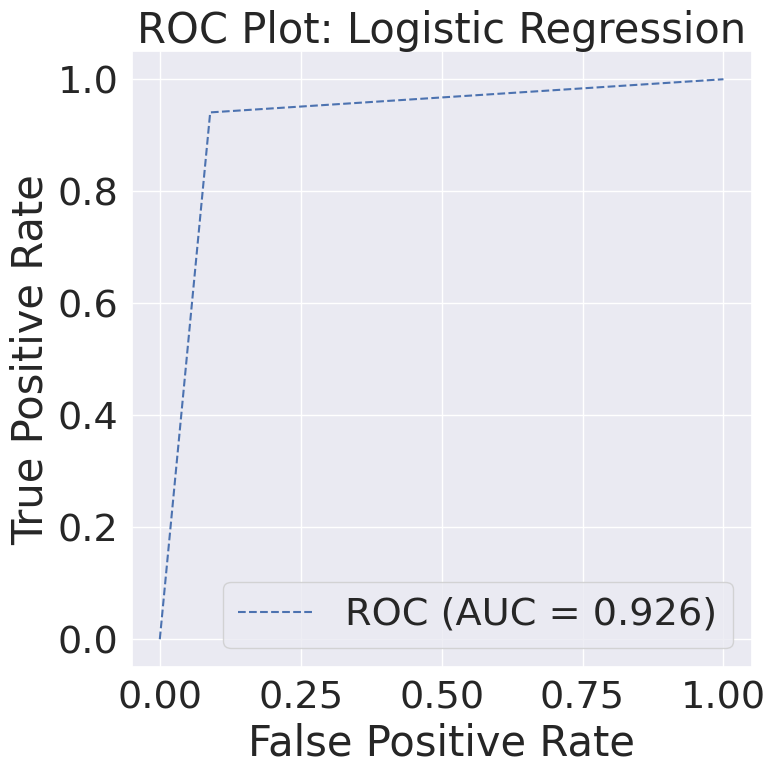

In [17]:
import time
from sklearn.linear_model import LogisticRegression
# Initialize the model
model1 = LogisticRegression(C=1.0)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model1.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions1 = model1.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model1.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions1)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions1)
print("Classification Report:\n", report)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1, average='macro')
recall = recall_score(y_test, predictions1, average='macro')
f1 = f1_score(y_test, predictions1, average='macro')
mcc = matthews_corrcoef(y_test, predictions1)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions1)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()

# ROC curve
lr_auc = roc_auc_score(y_test, predictions1)
print('AUC Score = %.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions1)

plt.figure(figsize=(8, 8))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='ROC (AUC = %0.3f)' % lr_auc)
plt.title('ROC Plot: Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0828 seconds
Testing Time: 0.0060 seconds
*******************************************
Training Accuracy: 0.9294401447381646
Testing Accuracy: 0.9267631103074141
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       481
           1       0.93      0.94      0.94       625

    accuracy                           0.93      1106
   macro avg       0.93      0.92      0.93      1106
weighted avg       0.93      0.93      0.93      1106

Accuracy Score: 0.9267631103074141
Precision Score: 0.9259570494864613
Recall Score: 0.9249014553014554
F1 Score: 0.9254093344490377
Matthews Correlation Coefficient: 0.8508578499907289
*******************************************
[[438  43]
 [ 38 587]]
True Positive =  587
False Positive =  43
False Negative =  38
True Negative =  438
*******************************************


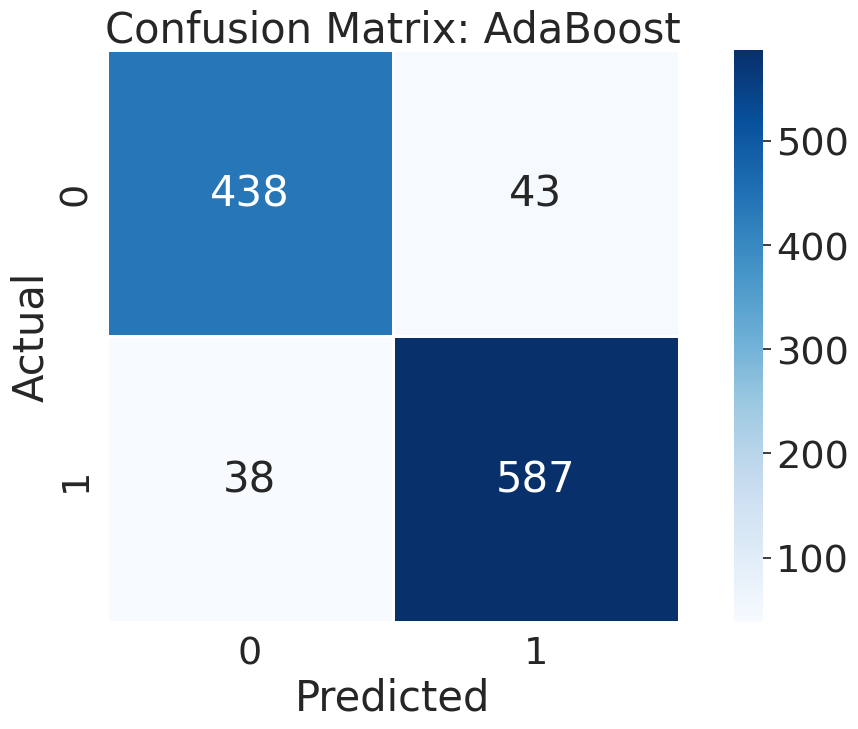

AUC Score = 0.925


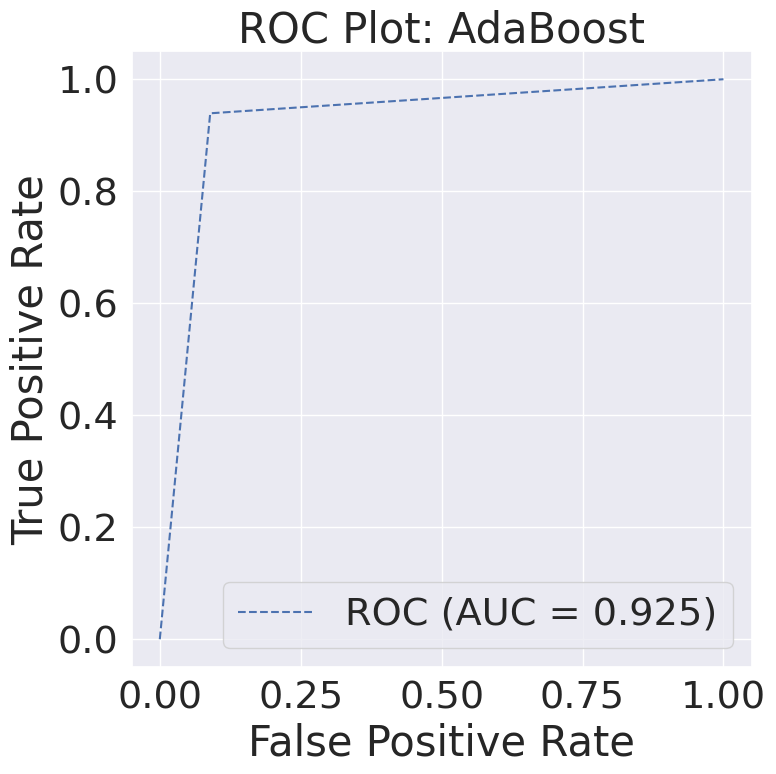

In [18]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the model
model3 = AdaBoostClassifier(n_estimators=10)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model3.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions3 = model3.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model3.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions3)
print("Classification Report:\n", report)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions3)
precision = precision_score(y_test, predictions3, average='macro')
recall = recall_score(y_test, predictions3, average='macro')
f1 = f1_score(y_test, predictions3, average='macro')
mcc = matthews_corrcoef(y_test, predictions3)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions3)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: AdaBoost')
plt.tight_layout()
plt.show()

# ROC curve
ab_auc = roc_auc_score(y_test, predictions3)
print('AUC Score = %.3f' % (ab_auc))
ab_fpr, ab_tpr, _ = roc_curve(y_test, predictions3)

plt.figure(figsize=(8, 8))
plt.plot(ab_fpr, ab_tpr, linestyle='--', label='ROC (AUC = %0.3f)' % ab_auc)
plt.title('ROC Plot: AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 10.1368 seconds
Testing Time: 0.0017 seconds
*******************************************
Training Accuracy: 0.9881395115086944
Testing Accuracy: 0.9710669077757685
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       481
           1       0.97      0.98      0.97       625

    accuracy                           0.97      1106
   macro avg       0.97      0.97      0.97      1106
weighted avg       0.97      0.97      0.97      1106

Accuracy Score: 0.9710669077757685
Precision Score: 0.9715172222611879
Recall Score: 0.9696099792099793
F1 Score: 0.9705099105765033
Matthews Correlation Coefficient: 0.9411252689057362
*******************************************
[[461  20]
 [ 12 613]]
True Positive =  613
False Positive =  20
False Negative =  12
True Negative =  461
*******************************************


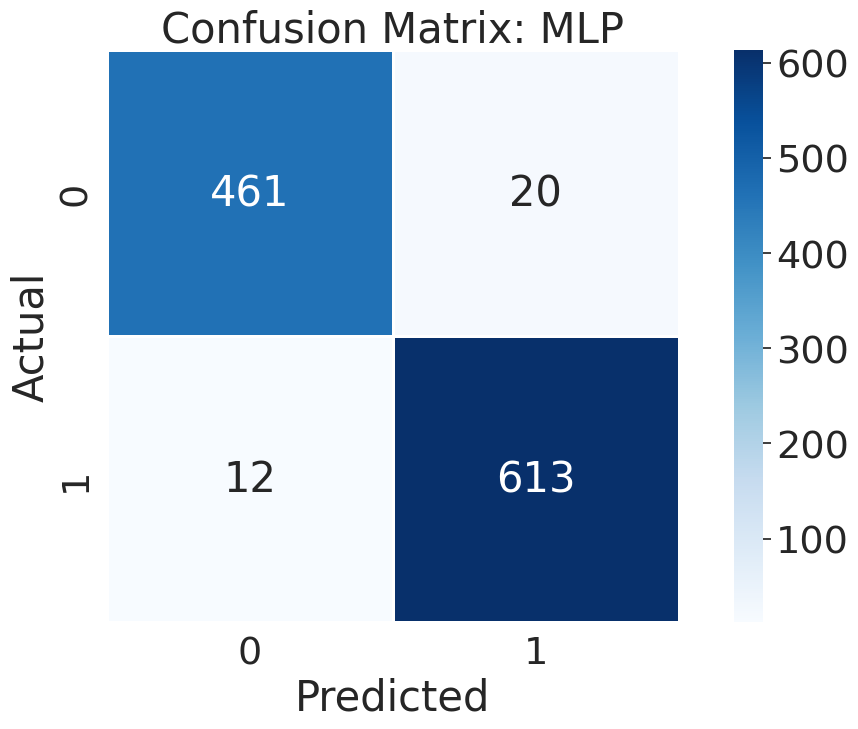

AUC Score = 0.970


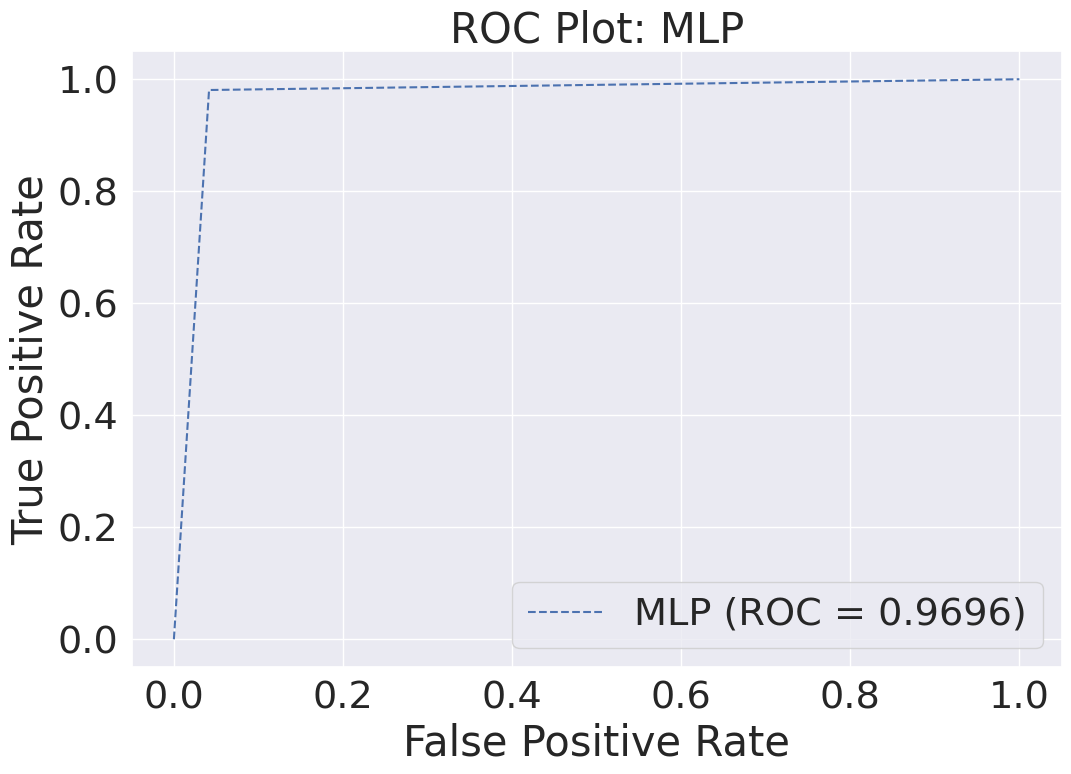

In [19]:
from sklearn.neural_network import MLPClassifier
# Initialize the model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model_mlp.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions_mlp = model_mlp.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_mlp)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions_mlp)
print("Classification Report:\n", report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_mlp)
precision = precision_score(y_test, predictions_mlp, average='macro')
recall = recall_score(y_test, predictions_mlp, average='macro')
f1 = f1_score(y_test, predictions_mlp, average='macro')
mcc = matthews_corrcoef(y_test, predictions_mlp)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_mlp)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: MLP')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
mlp_auc = roc_auc_score(y_test, predictions_mlp)
print('AUC Score = %.3f' % mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, predictions_mlp)

plt.figure(figsize=(12, 8))
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP (ROC = %0.4f)' % mlp_auc)
plt.title('ROC Plot: MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0203 seconds
Testing Time: 0.0005 seconds
*******************************************
Training Accuracy: 0.9591918785807619
Testing Accuracy: 0.9502712477396021
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       481
           1       0.96      0.96      0.96       625

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Accuracy Score: 0.9502712477396021
Precision Score: 0.9493197414618577
Recall Score: 0.949533471933472
F1 Score: 0.9494257919315723
Matthews Correlation Coefficient: 0.8988531879847761
*******************************************
[[454  27]
 [ 28 597]]
True Positive =  597
False Positive =  27
False Negative =  28
True Negative =  454
*******************************************


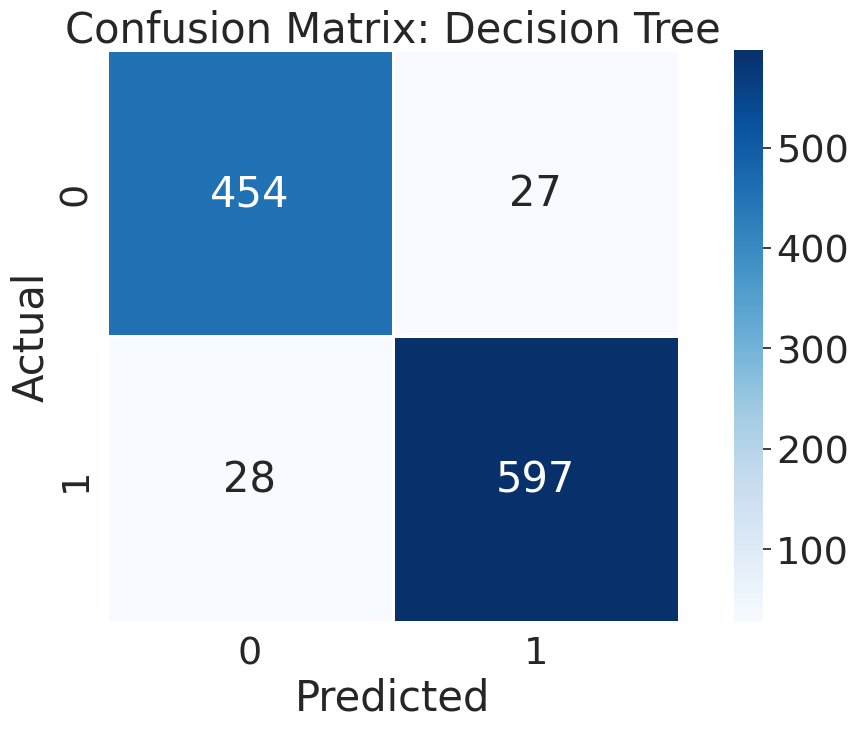

AUC Score = 0.950


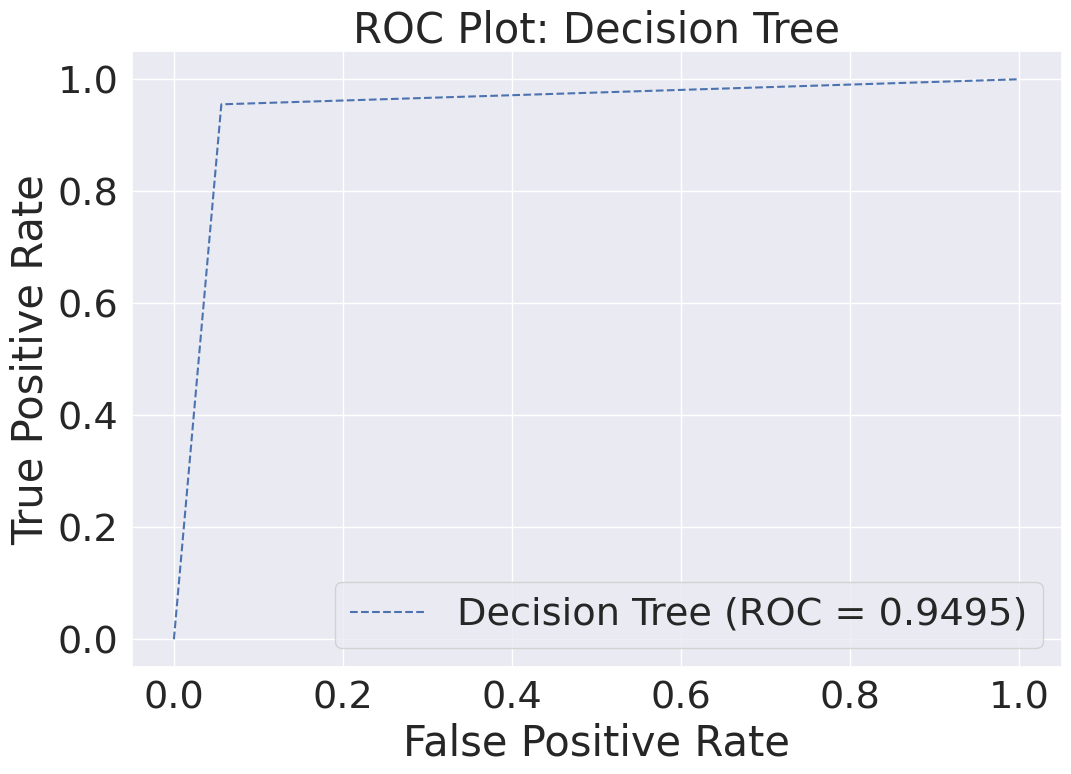

In [20]:

from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree (no n_estimators)
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model_dt.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions_dt = model_dt.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_dt)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_dt)
print("Classification Report:\n", report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_dt)
precision = precision_score(y_test, predictions_dt, average='macro')
recall = recall_score(y_test, predictions_dt, average='macro')
f1 = f1_score(y_test, predictions_dt, average='macro')
mcc = matthews_corrcoef(y_test, predictions_dt)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_dt)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Decision Tree')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
dt_auc = roc_auc_score(y_test, predictions_dt)
print('AUC Score = %.3f' % dt_auc)

dt_fpr, dt_tpr, _ = roc_curve(y_test, predictions_dt)

plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (ROC = %0.4f)' % dt_auc)
plt.title('ROC Plot: Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0568 seconds
Testing Time: 0.0032 seconds
Training Accuracy: 0.9546688109357725
Testing Accuracy: 0.953887884267631
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       481
           1       0.95      0.97      0.96       625

    accuracy                           0.95      1106
   macro avg       0.96      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Accuracy Score: 0.953887884267631
Precision Score: 0.9555100696405043
Recall Score: 0.9508174636174637
F1 Score: 0.9528640799821504
Matthews Correlation Coefficient: 0.9063153849462039
*******************************************
[[446  35]
 [ 16 609]]
True positive =  609
False positive =  35
False negative =  16
True negative =  446
*******************************************


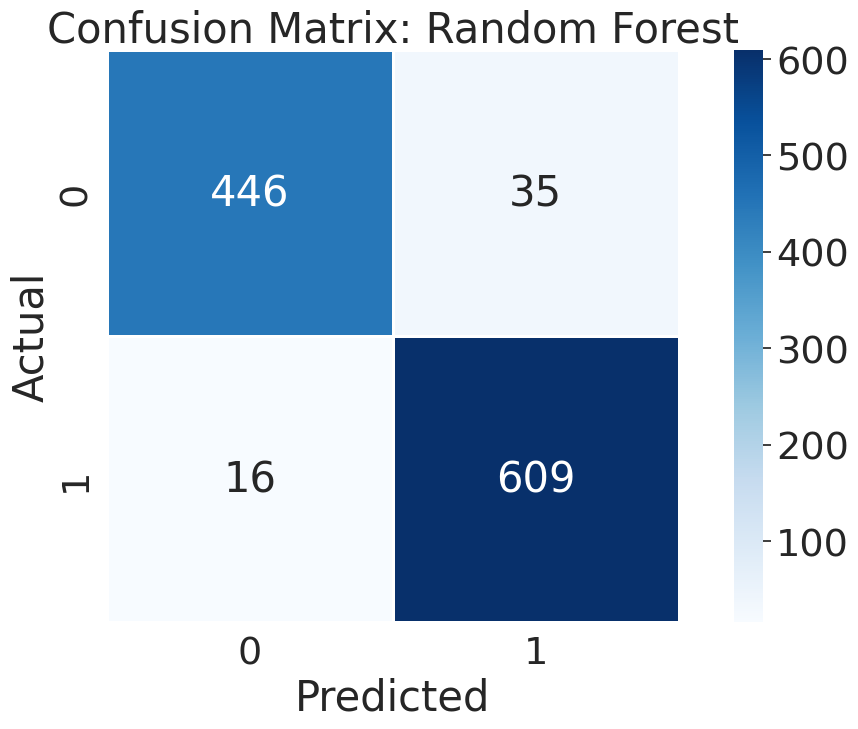

AUC Score = 0.951


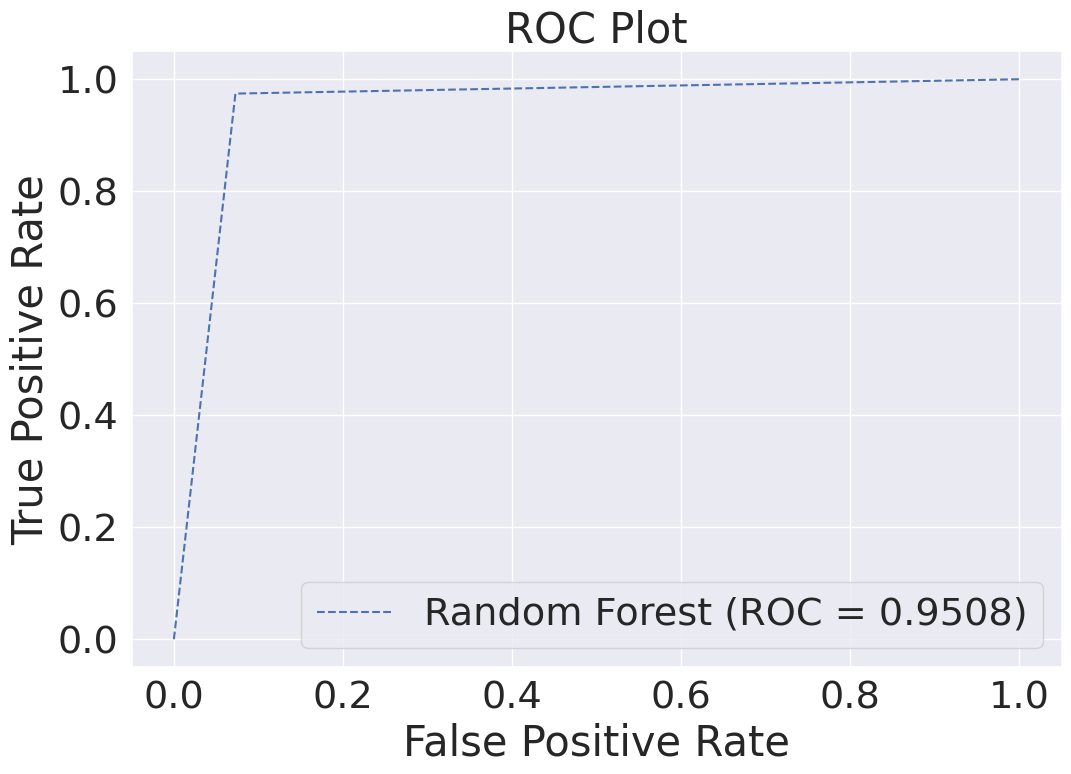

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Initialize model
model_rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Measure training time
start_train = time.time()
model_rf.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_rf = model_rf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_rf)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_rf)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf, average='macro')
recall = recall_score(y_test, predictions_rf, average='macro')
f1 = f1_score(y_test, predictions_rf, average='macro')
mcc = matthews_corrcoef(y_test, predictions_rf)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Random Forest')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
rf_auc = roc_auc_score(y_test, predictions_rf)
print('AUC Score = %.3f' % rf_auc)

rf_fpr, rf_tpr, _ = roc_curve(y_test, predictions_rf)

plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (ROC = %0.4f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0019 seconds
Testing Time: 0.1651 seconds
Training Accuracy: 0.9661272489697457
Testing Accuracy: 0.9547920433996383
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       481
           1       0.95      0.97      0.96       625

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Accuracy Score: 0.9547920433996383
Precision Score: 0.9548944754499697
Recall Score: 0.9530544698544698
F1 Score: 0.9539217352757864
Matthews Correlation Coefficient: 0.9079470808691732
*******************************************
[[452  29]
 [ 21 604]]
True positive =  604
False positive =  29
False negative =  21
True negative =  452
*******************************************


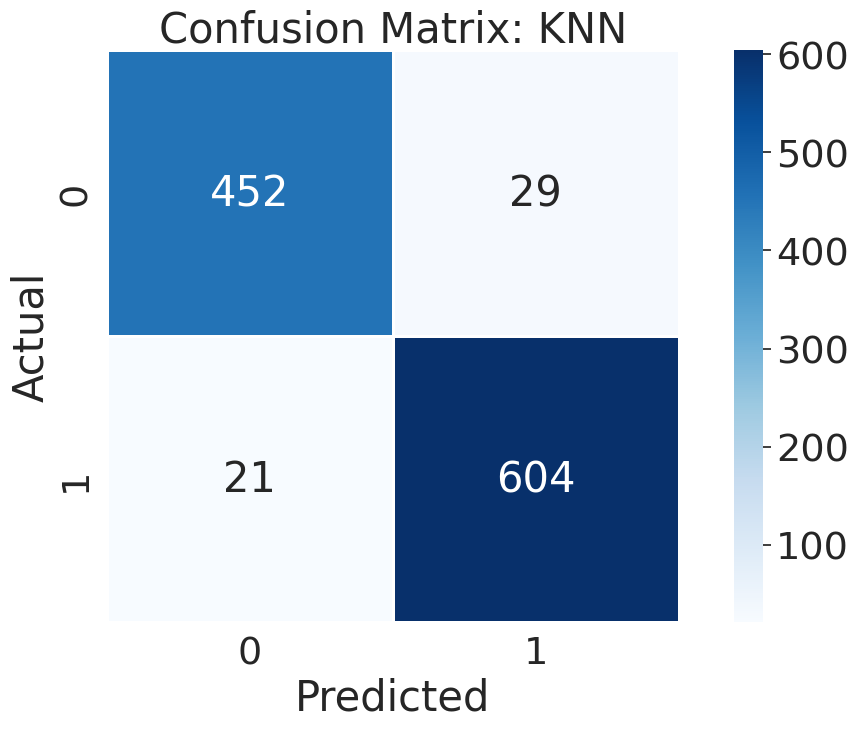

AUC Score = 0.953


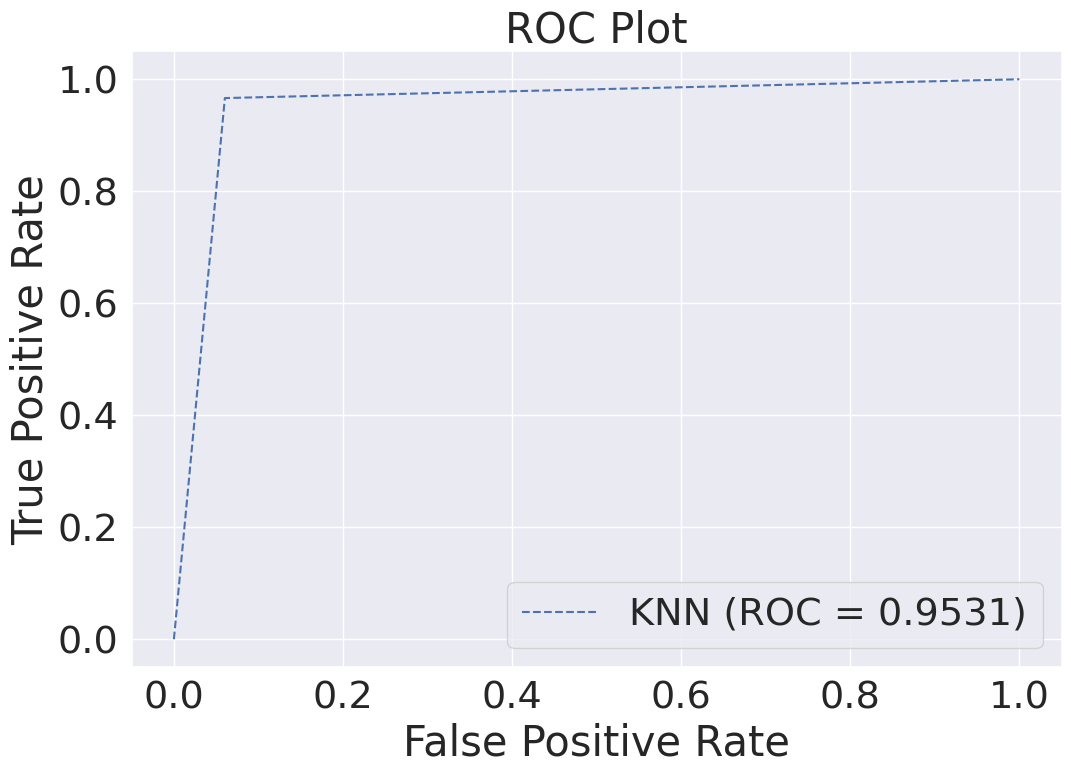

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train = time.time()
model_knn.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_knn = model_knn.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_knn)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_knn)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_knn)
precision = precision_score(y_test, predictions_knn, average='macro')
recall = recall_score(y_test, predictions_knn, average='macro')
f1 = f1_score(y_test, predictions_knn, average='macro')
mcc = matthews_corrcoef(y_test, predictions_knn)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_knn)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: KNN')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
knn_auc = roc_auc_score(y_test, predictions_knn)
print('AUC Score = %.3f' % knn_auc)

knn_fpr, knn_tpr, _ = roc_curve(y_test, predictions_knn)

plt.figure(figsize=(12, 8))
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN (ROC = %0.4f)' % knn_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 8.9876 seconds
Testing Time: 0.1706 seconds
Training Accuracy: 0.9584882902804301
Testing Accuracy: 0.9556962025316456
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       481
           1       0.95      0.97      0.96       625

    accuracy                           0.96      1106
   macro avg       0.96      0.95      0.95      1106
weighted avg       0.96      0.96      0.96      1106

Accuracy Score: 0.9556962025316456
Precision Score: 0.9564745599228358
Recall Score: 0.9533754677754678
F1 Score: 0.9547850927800818
Matthews Correlation Coefficient: 0.9098447496856076
*******************************************
[[450  31]
 [ 18 607]]
True positive =  607
False positive =  31
False negative =  18
True negative =  450
*******************************************


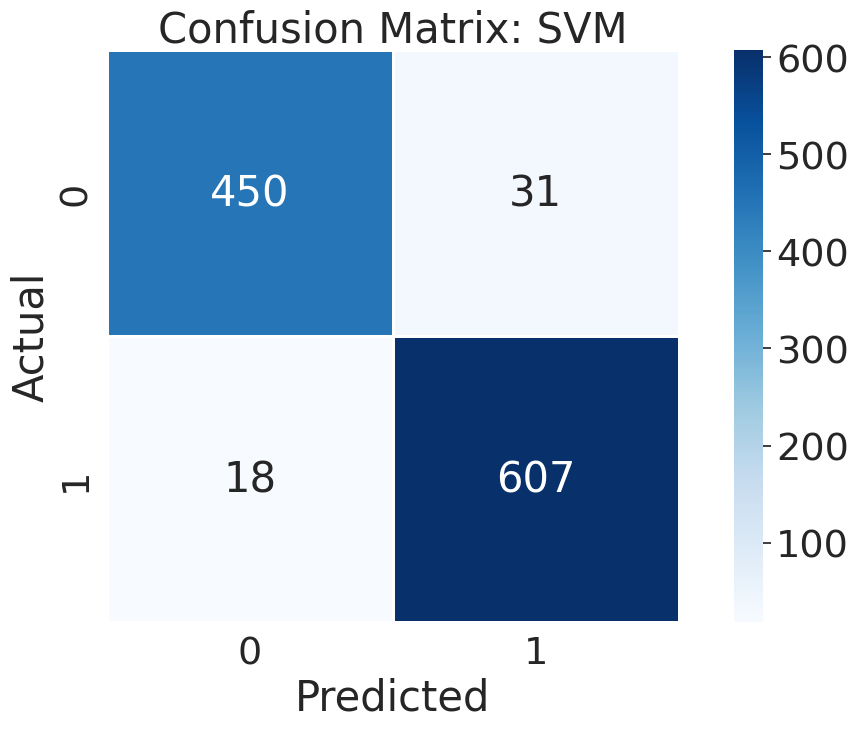

AUC Score = 0.989


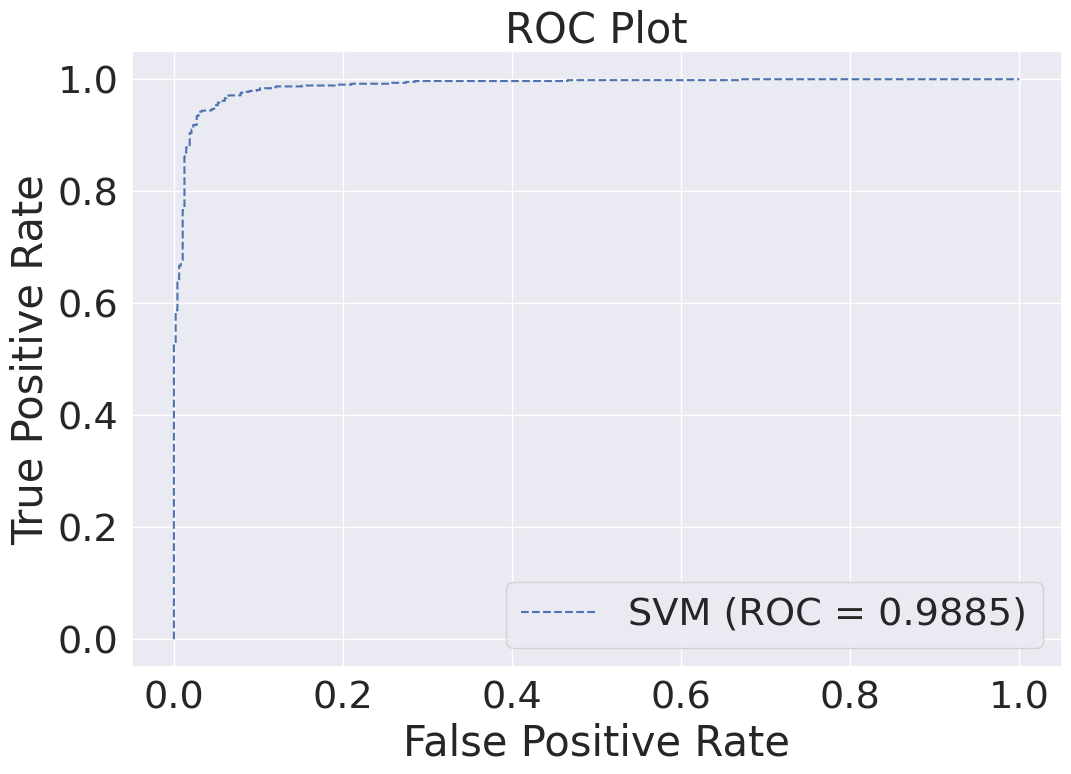

In [23]:
from sklearn.svm import SVC
# Initialize SVM model
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

# Measure training time
start_train = time.time()
model_svm.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_svm = model_svm.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_svm)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_svm)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_svm)
precision = precision_score(y_test, predictions_svm, average='macro')
recall = recall_score(y_test, predictions_svm, average='macro')
f1 = f1_score(y_test, predictions_svm, average='macro')
mcc = matthews_corrcoef(y_test, predictions_svm)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_svm)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: SVM')
plt.tight_layout()
plt.show()

# ROC Curve and AUC (need probability estimates)
svm_probs = model_svm.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
print('AUC Score = %.3f' % svm_auc)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(12, 8))
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (ROC = %0.4f)' % svm_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0594 seconds
Testing Time: 0.0009 seconds
Training Accuracy: 0.9223037491205146
Testing Accuracy: 0.9231464737793852
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       481
           1       0.92      0.94      0.93       625

    accuracy                           0.92      1106
   macro avg       0.92      0.92      0.92      1106
weighted avg       0.92      0.92      0.92      1106

Accuracy Score: 0.9231464737793852
Precision Score: 0.9233838519313304
Recall Score: 0.920024948024948
F1 Score: 0.9215245981693803
Matthews Correlation Coefficient: 0.8434021114558805
*******************************************
[[431  50]
 [ 35 590]]
True positive =  590
False positive =  50
False negative =  35
True negative =  431
*******************************************


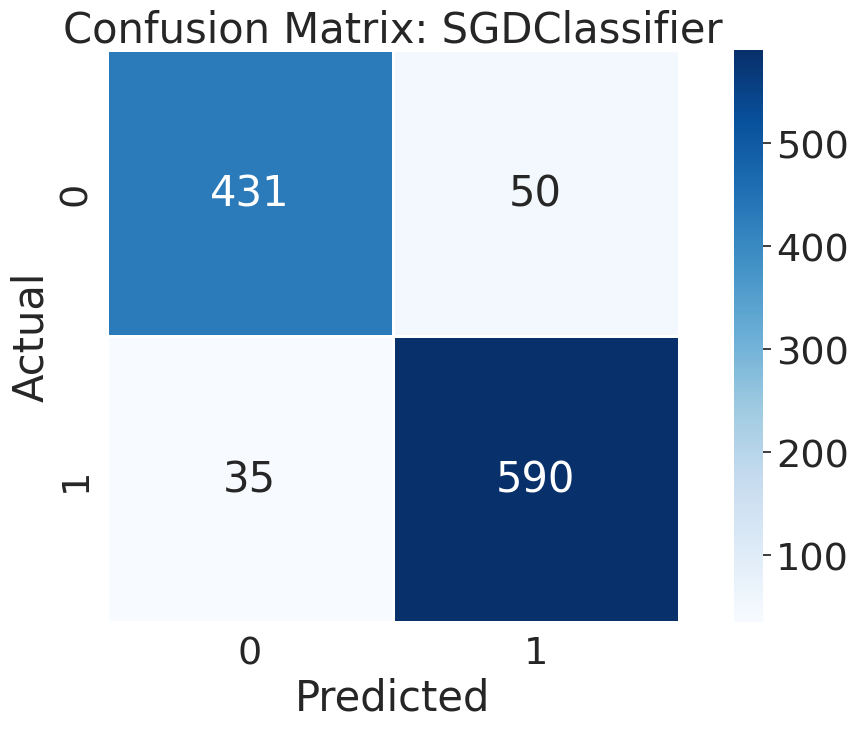

AUC Score = 0.977


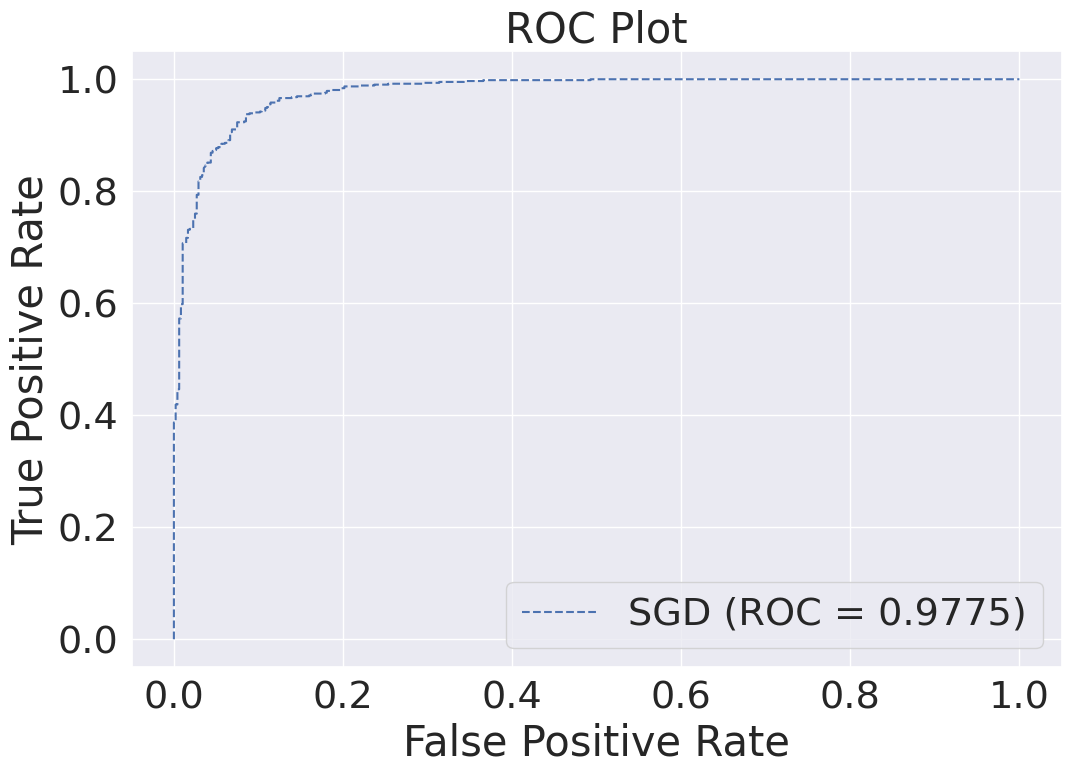

In [24]:
from sklearn.linear_model import SGDClassifier
# Initialize SGD Classifier
model_sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

# Measure training time
start_train = time.time()
model_sgd.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_sgd = model_sgd.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_sgd.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_sgd)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_sgd)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_sgd)
precision = precision_score(y_test, predictions_sgd, average='macro')
recall = recall_score(y_test, predictions_sgd, average='macro')
f1 = f1_score(y_test, predictions_sgd, average='macro')
mcc = matthews_corrcoef(y_test, predictions_sgd)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_sgd)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: SGDClassifier')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
sgd_probs = model_sgd.predict_proba(X_test)[:, 1]
sgd_auc1 = roc_auc_score(y_test, sgd_probs)
print('AUC Score = %.3f' % sgd_auc1)

sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)

plt.figure(figsize=(12, 8))
plt.plot(sgd_fpr, sgd_tpr, linestyle='--', label='SGD (ROC = %0.4f)' % sgd_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


2025-10-31 20:46:05,202 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7, 'k': 30, 'p': 2}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.0282
2025-10-31 21:12:04,150 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.028244187250985875, best pos: [148.13440166  22.94170554   0.32992322   4.32299867   1.69977299
   0.8339769 ]



Best Hyperparameters from PSO:
  n_estimators       : 148
  max_depth          : 22
  max_features       : 0.330
  min_samples_split  : 4
  min_samples_leaf   : 1
  criterion          : entropy

Model Evaluation:
Training Accuracy : 0.9883
Testing Accuracy  : 0.9711
Precision          : 0.9724
Recall             : 0.9689
F1 Score           : 0.9705
Matthews Corrcoef  : 0.9413
Training Time      : 0.6501 seconds
Testing Time       : 0.0671 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       481
           1       0.96      0.99      0.97       625

    accuracy                           0.97      1106
   macro avg       0.97      0.97      0.97      1106
weighted avg       0.97      0.97      0.97      1106

Confusion Matrix:
[[458  23]
 [  9 616]]
True Positives : 616
False Positives: 23
False Negatives: 9
True Negatives : 458


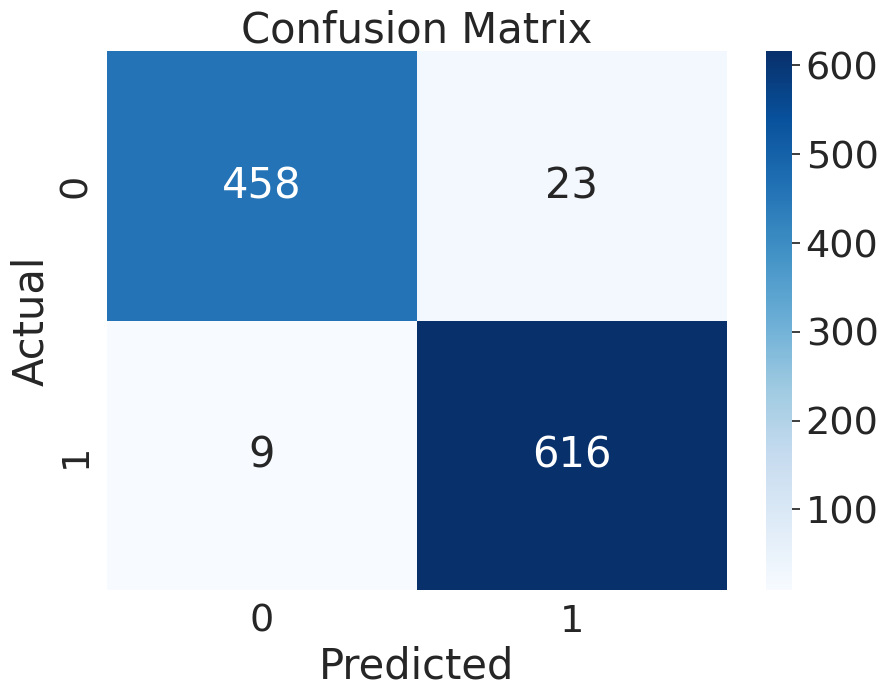

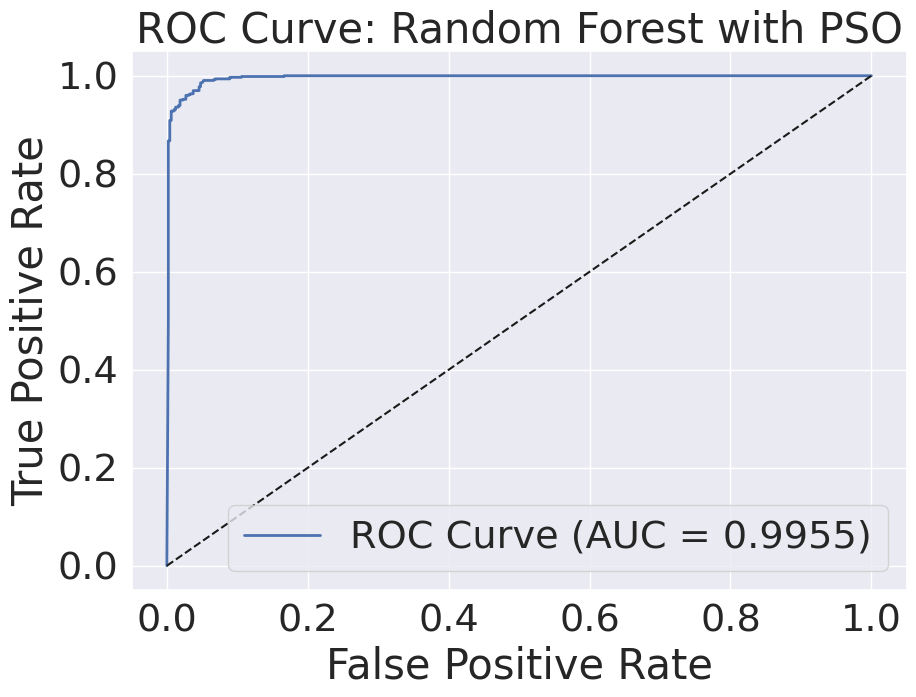

In [25]:
import time

# -----------------------------------------------------------
# PSO search space for Random Forest with 6 hyperparameters
# -----------------------------------------------------------
# [n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, criterion]
bounds = (
    np.array([50, 0, 0.1, 2, 1, 0]),       # Lower bounds
    np.array([500, 30, 1.0, 20, 20, 1])    # Upper bounds
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

def objective_function(params):
    losses = []
    for p in params:
        n_estimators = int(p[0])
        max_depth = None if int(p[1]) == 0 else int(p[1])
        max_features = float(p[2])
        min_samples_split = int(p[3])
        min_samples_leaf = int(p[4])
        criterion = 'gini' if int(round(p[5])) == 0 else 'entropy'

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            criterion=criterion,
            random_state=42,
            n_jobs=-1
        )

        score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy').mean()
        losses.append(1 - score)

    return np.array(losses)

# -----------------------------------------------------------
# Run PSO
# -----------------------------------------------------------
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7, 'k': 30, 'p': 2}
optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=6, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(objective_function, iters=10)

# -----------------------------------------------------------
# Train optimized model
# -----------------------------------------------------------
best_n_estimators = int(best_params[0])
best_max_depth = None if int(best_params[1]) == 0 else int(best_params[1])
best_max_features = float(best_params[2])
best_min_samples_split = int(best_params[3])
best_min_samples_leaf = int(best_params[4])
best_criterion = 'gini' if int(round(best_params[5])) == 0 else 'entropy'

print("\nBest Hyperparameters from PSO:")
print(f"  n_estimators       : {best_n_estimators}")
print(f"  max_depth          : {best_max_depth}")
print(f"  max_features       : {best_max_features:.3f}")
print(f"  min_samples_split  : {best_min_samples_split}")
print(f"  min_samples_leaf   : {best_min_samples_leaf}")
print(f"  criterion          : {best_criterion}")

model_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    criterion=best_criterion,
    random_state=42,
    n_jobs=-1
)

# -----------------------------------------------------------
# Measure Training Time
# -----------------------------------------------------------
start_train = time.time()
model_rf.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# -----------------------------------------------------------
# Measure Testing Time
# -----------------------------------------------------------
start_test = time.time()
predictions_rf = model_rf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

prob_rf = model_rf.predict_proba(X_test)[:, 1]  # for ROC curve

# -----------------------------------------------------------
# Metrics
# -----------------------------------------------------------
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf, average='macro')
recall = recall_score(y_test, predictions_rf, average='macro')
f1 = f1_score(y_test, predictions_rf, average='macro')
mcc = matthews_corrcoef(y_test, predictions_rf)
report = classification_report(y_test, predictions_rf)

print("\nModel Evaluation:")
print(f"Training Accuracy : {train_accuracy:.4f}")
print(f"Testing Accuracy  : {test_accuracy:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Matthews Corrcoef  : {mcc:.4f}")
print(f"Training Time      : {training_time:.4f} seconds")
print(f"Testing Time       : {testing_time:.4f} seconds")
print("\nClassification Report:\n", report)

# -----------------------------------------------------------
# Confusion Matrix
# -----------------------------------------------------------
conf_matrix = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Positives : {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives : {TN}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------------------
# ROC Curve & AUC
# -----------------------------------------------------------
auc = roc_auc_score(y_test, prob_rf)
fpr, tpr, _ = roc_curve(y_test, prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest with PSO')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# -----------------------------------------------------------
# Explainable AI Integration using LIME
# -----------------------------------------------------------
from lime import lime_tabular
import numpy as np

# Create a LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns if hasattr(X_train, 'columns') else [f"Feature_{i}" for i in range(X_train.shape[1])],
    class_names=['Class 0', 'Class 1'],  # rename based on your dataset
    mode='classification'
)

# Select a single instance to explain
sample_index = 0
sample = X_test[sample_index, :] if isinstance(X_test, np.ndarray) else X_test.iloc[sample_index, :].values

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=model_rf.predict_proba,
    num_features=10  # top 10 features contributing to the prediction
)

# Show explanation in a readable table
print("\nLIME Explanation for Sample Index =", sample_index)
lime_exp.as_list()
lime_exp.show_in_notebook(show_table=True)


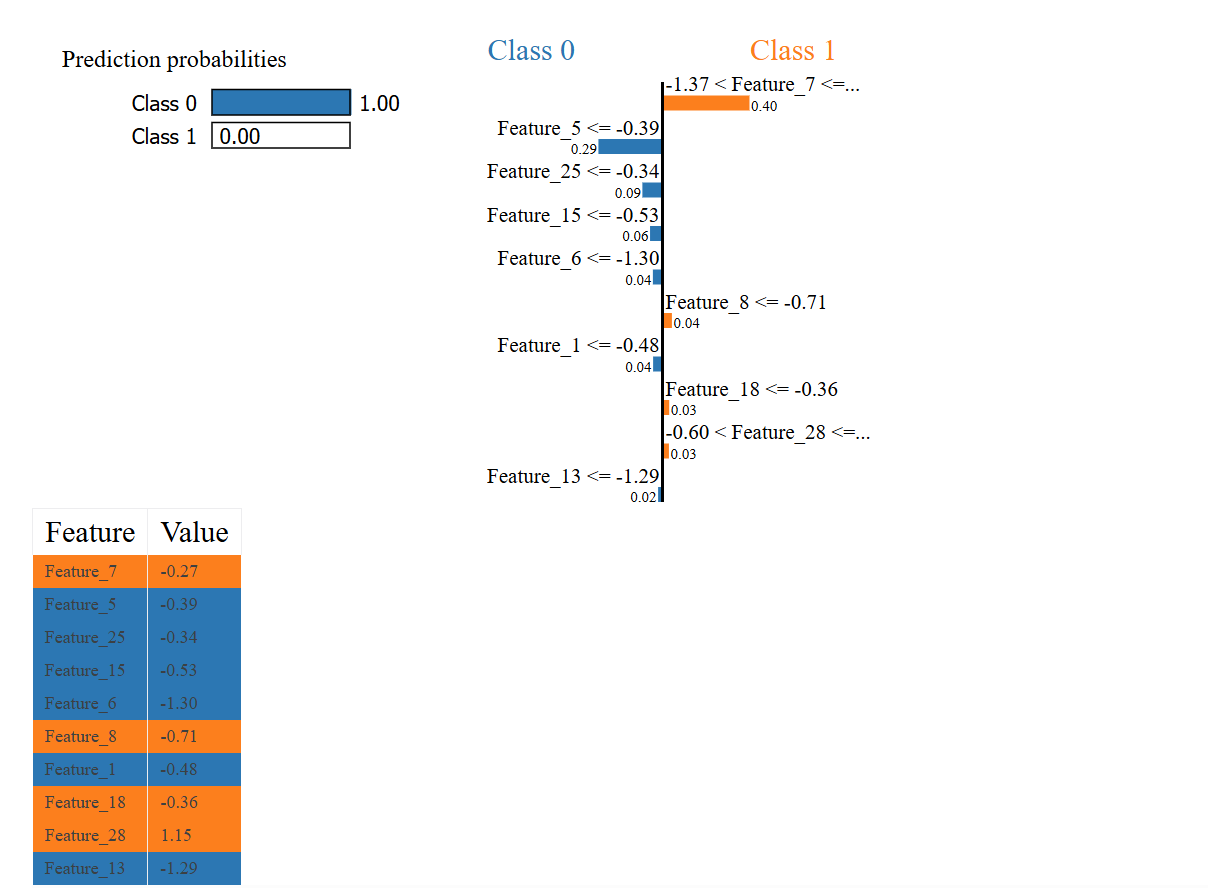